<a href="https://colab.research.google.com/github/whatsgoodg/ML-DL-basics/blob/main/2_1_k_nearest_neighbors_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

k-최근접 이웃 회귀 모델을 위한 data set         
feature          
* length          
             
target  
* weight           
legnth로 weight를 예측함

In [ ]:
import numpy as np 
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

산점도 확인

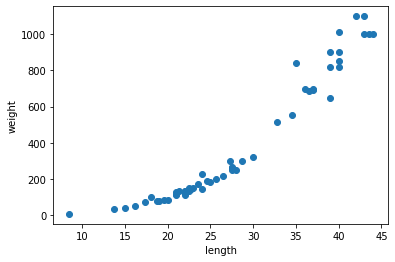

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

train set, test set splitting

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

scikit-learn 학습을 위한 넘파이 2차원 배열로 변경            
input은 2차원, target은 2차원

In [ ]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

결정계수를 정확도로 사용하는 k-최근접 이웃 회귀 모델 객체 생성 후        
훈련

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

결정 계수는 **1- (타깃 - 예측값)^2의 합 / (타깃 - 총 타깃의 평균 - 예측값)^2의 합**             
* 예측값이 타깃과 가까우면 1에 가까움         
* 예측값이 총 타깃의 평균과 가가우면 0에 가까움           

In [ ]:
knr.score(test_input, test_target)

0.992809406101064

높아서 좋아보이나 직관적인 이해가 어려움         
그렇기 때문에 **(타깃 - 예측값)의 절댓값의 평균**을 이용하여 직관적인 이해         

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
mae

19.157142857142862

예측값과 실제값의 차이의 평균은 약 19g        

훈련 셋을 통한 정확도

In [ ]:
knr.score(train_input, train_target)

0.9698823289099254

테스트 셋을 통한 정확도

In [ ]:
knr.score(test_input, test_target)

0.992809406101064

테스트 셋 > 훈련 셋        
이는 **과소적합**이다. 훈련 셋과 테스트 셋의 크기가 작아서 그런 것 같다. 

이를 해결하기 위해 최근접 이웃의 개수를 줄임.        
이를 줄인다면 국지적인 패턴에 영향을 더 받는다.      
만약 크다면 전체 데이터 셋의 영향을 많이 받는다.    
       
훈련 셋의 정확도



In [ ]:
knr.neighbors = 3
# 다시 훈련
knr.fit(train_input, train_target)
knr.score(train_input, train_target)

0.9698823289099254

테스트 셋의 정확도 확인

In [ ]:
knr.score(test_input, test_target)

0.992809406101064

문제 해결, 이제 훈련 셋의 산점도로 확인해보자

In [ ]:
train_input[2, 0]

18.7

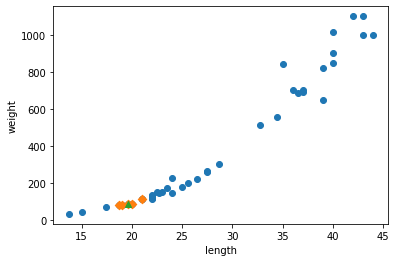

prediction is 88.600000 and target is 85.000000


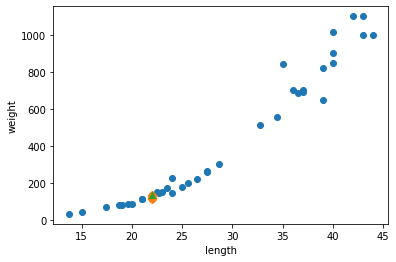

prediction is 123.000000 and target is 135.000000


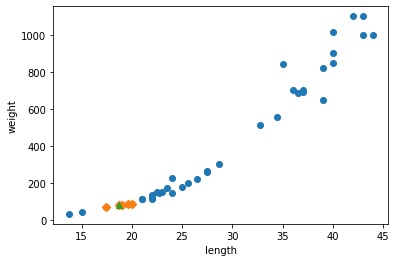

prediction is 79.600000 and target is 78.000000


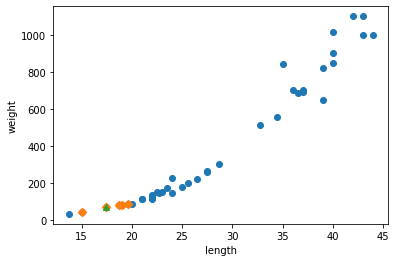

prediction is 70.600000 and target is 70.000000


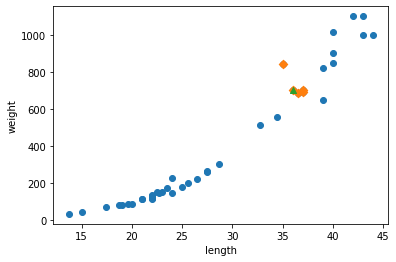

prediction is 723.000000 and target is 700.000000


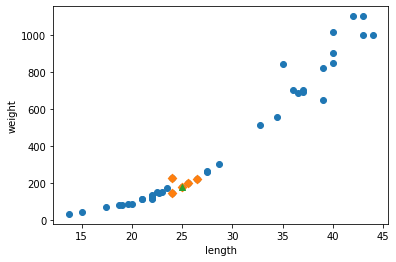

prediction is 193.000000 and target is 180.000000


In [ ]:
from time import sleep
cnt=0
for i,j in zip(train_input, train_target):
  distances, indexes = knr.kneighbors([i])
  plt.scatter(train_input, train_target)
  plt.scatter(train_input[indexes], train_target[indexes], marker='D')
  plt.scatter(i, j, marker='^')
  plt.xlabel("length")
  plt.ylabel("weight")
  plt.show()
  print('prediction is {0:0.6f} and target is {1:0.6f}'.format(knr.predict([i])[0], j))
  if cnt == 5: break
  cnt = cnt + 1